In [88]:
import pandas as pd

pre_data = pd.read_csv('EAFC26-Men.csv')


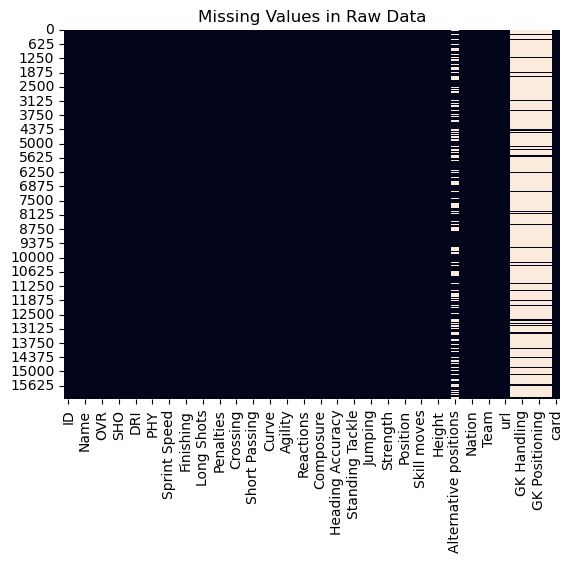

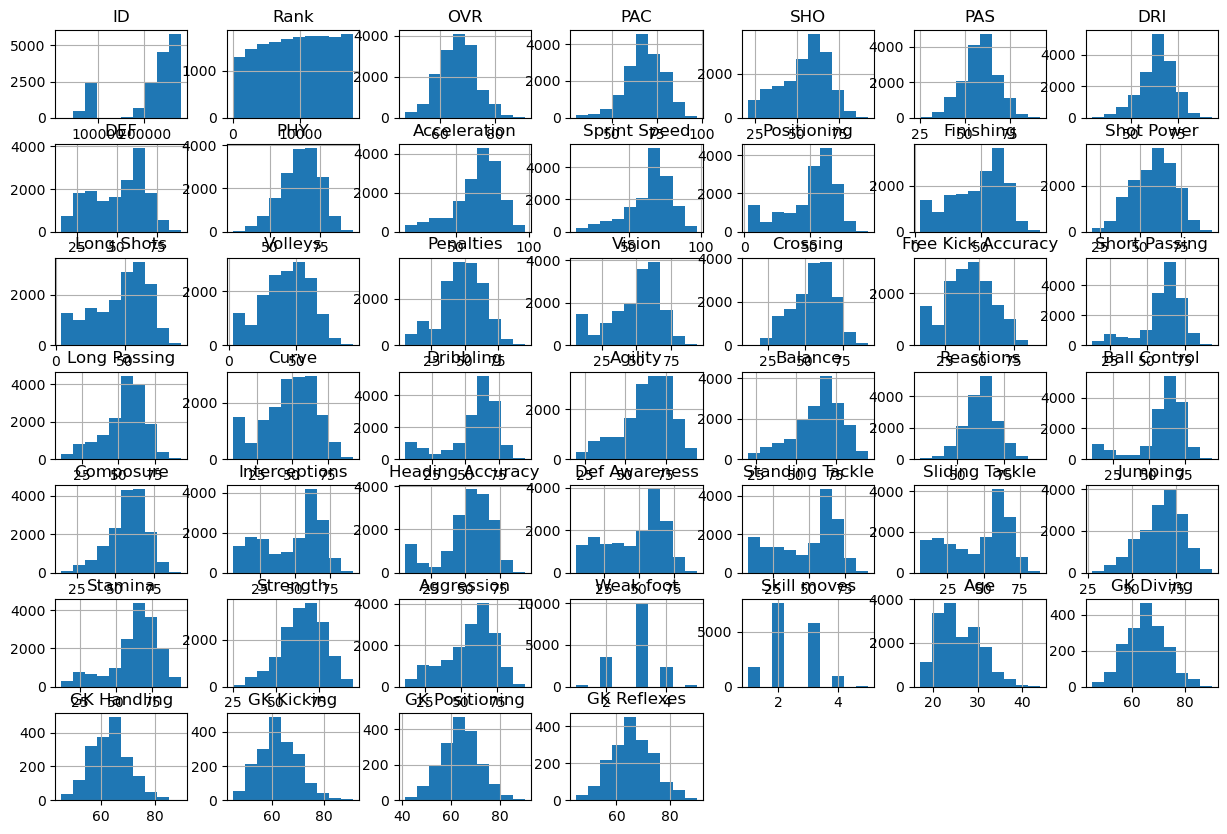

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing values heatmap
sns.heatmap(pre_data.isnull(), cbar=False)
plt.title("Missing Values in Raw Data")
plt.show()

# Distribution of numerical features
pre_data.hist(figsize=(15,10))
plt.show()

In [90]:
pre_data['Weight']

0        72kg / 159lb
1        75kg / 165lb
2        67kg / 148lb
3        82kg / 181lb
4        92kg / 203lb
             ...     
16223    66kg / 146lb
16224    65kg / 143lb
16225    70kg / 154lb
16226    69kg / 152lb
16227    65kg / 143lb
Name: Weight, Length: 16228, dtype: object

In [91]:
pre_data['Height'] 

0         175cm / 5'9"
1         182cm / 6'0"
2        178cm / 5'10"
3         190cm / 6'3"
4         193cm / 6'4"
             ...      
16223     167cm / 5'6"
16224    178cm / 5'10"
16225     176cm / 5'9"
16226    180cm / 5'11"
16227    180cm / 5'11"
Name: Height, Length: 16228, dtype: object

In [92]:
#Height --> 155 cm 
pre_data["Height"] = pre_data["Height"].astype("str") 
pre_data["Height"] = pre_data["Height"].str.extract(r'(\d+)')
pre_data["Height"] = pd.to_numeric(pre_data["Height"],errors='coerce')
#Weight --> 72kg / 159lb
pre_data['Weight'] = pre_data['Weight'].astype('str')
pre_data['Weight'] = pre_data['Weight'].str.extract(r'(\d+)')
pre_data['Weight'] = pd.to_numeric( pre_data['Weight'],errors = 'coerce')



In [93]:
pre_data['Weight']

0        72
1        75
2        67
3        82
4        92
         ..
16223    66
16224    65
16225    70
16226    69
16227    65
Name: Weight, Length: 16228, dtype: int64

In [94]:
pre_data['Height'] 

0        175
1        182
2        178
3        190
4        193
        ... 
16223    167
16224    178
16225    176
16226    180
16227    180
Name: Height, Length: 16228, dtype: int64

In [95]:
data = pre_data.drop(columns=['ID','Rank','Name','GENDER',
                   'Weak foot','Team',
                   'Alternative positions','Balance','Nation',
                   'url','card','Team','League','play style','GK Diving',
                   'GK Handling','GK Kicking','GK Positioning','GK Reflexes'])


In [96]:
pd.set_option('display.max_columns', None)
data.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Position,Skill moves,Preferred foot,Height,Weight,Age
0,91,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,94,90,93,55,59,38,43,41,79,88,75,63,RM,4,Left,175,72,33
1,91,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,91,93,88,38,78,26,34,32,90,83,77,61,ST,5,Right,182,75,26
2,90,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,91,94,88,45,74,49,49,39,84,76,69,58,ST,5,Left,178,67,28
3,90,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,93,90,93,84,81,88,87,82,83,91,83,85,CDM,3,Right,190,82,29
4,90,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,90,77,90,91,88,91,91,87,89,75,93,85,CB,2,Right,193,92,34


In [97]:
data.dtypes

OVR                    int64
PAC                    int64
SHO                    int64
PAS                    int64
DRI                    int64
DEF                    int64
PHY                    int64
Acceleration           int64
Sprint Speed           int64
Positioning            int64
Finishing              int64
Shot Power             int64
Long Shots             int64
Volleys                int64
Penalties              int64
Vision                 int64
Crossing               int64
Free Kick Accuracy     int64
Short Passing          int64
Long Passing           int64
Curve                  int64
Dribbling              int64
Agility                int64
Reactions              int64
Ball Control           int64
Composure              int64
Interceptions          int64
Heading Accuracy       int64
Def Awareness          int64
Standing Tackle        int64
Sliding Tackle         int64
Jumping                int64
Stamina                int64
Strength               int64
Aggression    

In [99]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
data['Preferred foot'] = data['Preferred foot'].astype(str)
data['Preferred foot'] = lb.fit_transform(data['Preferred foot'])
data['Preferred foot']

0        0
1        1
2        0
3        1
4        1
        ..
16223    1
16224    1
16225    1
16226    1
16227    1
Name: Preferred foot, Length: 16228, dtype: int64

In [102]:
data = pd.get_dummies(data,columns=['Position'],drop_first=True)
data.columns 

Index(['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Skill moves', 'Preferred foot', 'Height', 'Weight', 'Age',
       'Position_CB', 'Position_CDM', 'Position_CM', 'Position_GK',
       'Position_LB', 'Position_LM', 'Position_LW', 'Position_RB',
       'Position_RM', 'Position_RW', 'Position_ST'],
      dtype='object')

In [103]:
data.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Skill moves,Preferred foot,Height,Weight,Age,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST
0,91,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,94,90,93,55,59,38,43,41,79,88,75,63,4,0,175,72,33,False,False,False,False,False,False,False,False,True,False,False
1,91,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,91,93,88,38,78,26,34,32,90,83,77,61,5,1,182,75,26,False,False,False,False,False,False,False,False,False,False,True
2,90,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,91,94,88,45,74,49,49,39,84,76,69,58,5,0,178,67,28,False,False,False,False,False,False,False,False,False,False,True
3,90,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,93,90,93,84,81,88,87,82,83,91,83,85,3,1,190,82,29,False,True,False,False,False,False,False,False,False,False,False
4,90,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,90,77,90,91,88,91,91,87,89,75,93,85,2,1,193,92,34,True,False,False,False,False,False,False,False,False,False,False


In [104]:
position_select = ['Position_CB', 'Position_CDM', 'Position_CM', 'Position_GK',
       'Position_LB', 'Position_LM', 'Position_LW', 'Position_RB',
       'Position_RM', 'Position_RW', 'Position_ST'] 
data[position_select] = data[position_select].astype(int)

In [105]:
data.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Skill moves,Preferred foot,Height,Weight,Age,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST
0,91,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,94,90,93,55,59,38,43,41,79,88,75,63,4,0,175,72,33,0,0,0,0,0,0,0,0,1,0,0
1,91,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,91,93,88,38,78,26,34,32,90,83,77,61,5,1,182,75,26,0,0,0,0,0,0,0,0,0,0,1
2,90,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,91,94,88,45,74,49,49,39,84,76,69,58,5,0,178,67,28,0,0,0,0,0,0,0,0,0,0,1
3,90,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,93,90,93,84,81,88,87,82,83,91,83,85,3,1,190,82,29,0,1,0,0,0,0,0,0,0,0,0
4,90,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,90,77,90,91,88,91,91,87,89,75,93,85,2,1,193,92,34,1,0,0,0,0,0,0,0,0,0,0


In [114]:
missing = data.isnull().sum()
print(missing)

OVR                   0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF                   0
PHY                   0
Acceleration          0
Sprint Speed          0
Positioning           0
Finishing             0
Shot Power            0
Long Shots            0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free Kick Accuracy    0
Short Passing         0
Long Passing          0
Curve                 0
Dribbling             0
Agility               0
Reactions             0
Ball Control          0
Composure             0
Interceptions         0
Heading Accuracy      0
Def Awareness         0
Standing Tackle       0
Sliding Tackle        0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Skill moves           0
Preferred foot        0
Height                0
Weight                0
Age                   0
Position_CB           0
Position_CDM    

In [107]:
orginal_columns = data.columns 

In [109]:
data = pd.DataFrame(
    data,
    columns=orginal_columns)

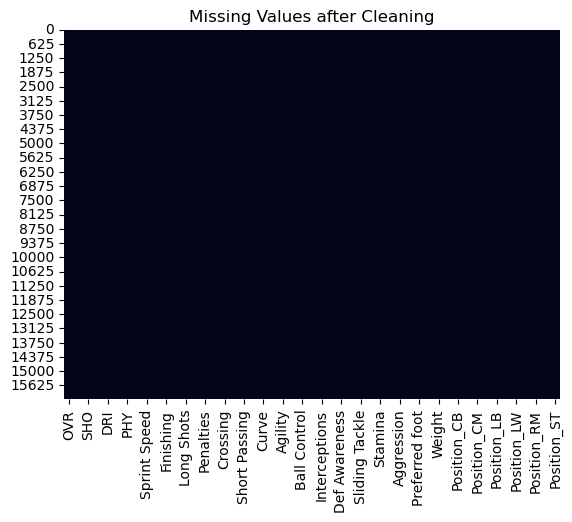

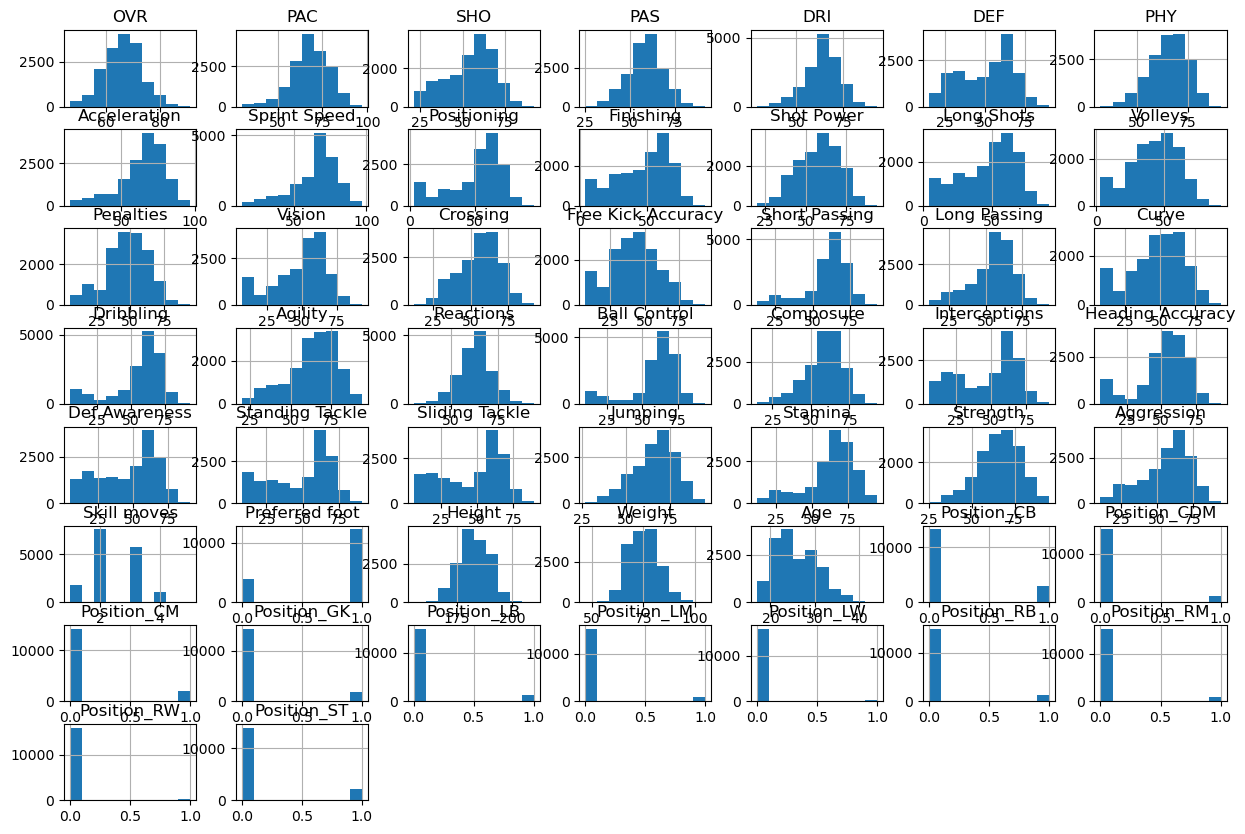

In [111]:
# Check Missing again
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values after Cleaning")
plt.show()

# Distribution of numeric columns
data.hist(figsize=(15,10))
plt.show()

In [112]:
data.to_csv('CD-EAFC26-Men.csv',index=False)